In [1]:
import numpy as np
import matplotlib.pyplot as plt

class IsingSimulation:

    J = 6.34369e-21  # Interaction constant for iron [Joule]
    kB = 1.38065e-23  # Boltzmann constant [Joule / Kelvin]

    def __init__(self, size, temperature=300):
        '''
        Create a new Ising model simulation. The state is initialized
        randomly.

        Arguments:

            size (int) The number of cells along each dimension of the
              square grid.

            temperature (float) The temperature in Kelvin at which to
              run the simulation. The Curie temperature for iron is
              1043 K. Room temperature is about 300 K. Default: 300.
        '''
        self.size = size
        self.temperature = temperature
        self.state = np.random.choice(
            [-1, +1], size=(self.size, self.size))
        self.step = 0

    def set_temperature(self, temp):
        '''
        Set the temperature of the model in Kelvin.
        '''
        self.temperature = float(temp)

    def energy(self):
        '''
        Compute the energy of the current state of the model.
        '''
        return -self.J * (self.state * (
            np.roll(self.state, 1, axis=0) +
            np.roll(self.state, 1, axis=1))).sum()

    def average_magnetism(self):
        '''
        Compute the average per-cell magnetism of the current state
        of the model.
        '''
        return self.state.mean()

    def update(self):
        '''
        Do a single cell update of the model state.
        '''
        # Pick a random cell to flip
        i, j = np.random.randint(self.size, size=2)

        # Change in energy from current state to next state
        delta_E = 2 * self.J * self.state[i,j] * (
            self.state[(i + 1) % self.size, j] +
            self.state[(i - 1) % self.size, j] +
            self.state[i, (j + 1) % self.size] +
            self.state[i, (j - 1) % self.size])

        # Log probability of changing state
        log_p = -delta_E / (self.temperature * self.kB)
        if np.log(np.random.uniform(0, 1)) < log_p:
            self.state[i,j] = -self.state[i,j]

        self.step += 1

    def display(self):
        '''
        Plot the state of the model.
        '''
        plt.figure()
        plt.imshow(self.state, vmin=-1, vmax=+1)
        plt.title('Step: ' + str(self.step) + ', M = ' + str(self.average_magnetism()))

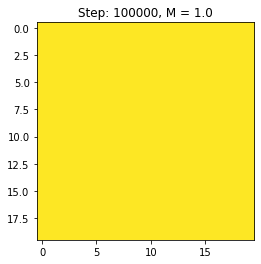

In [4]:
size = 20
sim = IsingSimulation(size, temperature=1)  # Ising model at the Curie temperature
for _ in range(100000):
    sim.update()
sim.display()

(array([28.,  0.,  2.,  6., 10., 16.,  3.,  1.,  0., 34.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

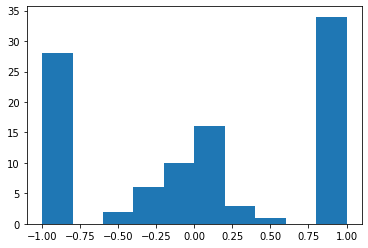

In [5]:
mags = []
for i in range(100):
    sim = IsingSimulation(size, temperature=1)  # Ising model at the Curie temperature
    for _ in range(100000):
        sim.update()
    mags.append(sim.average_magnetism())

plt.hist(mags, bins = 10)

Finished 0 runs of simulation
Finished 1 runs of simulation
Finished 2 runs of simulation
Finished 3 runs of simulation
Finished 4 runs of simulation
Finished 5 runs of simulation
Finished 6 runs of simulation
Finished 7 runs of simulation
Finished 8 runs of simulation
Finished 9 runs of simulation
Finished 10 runs of simulation
Finished 11 runs of simulation
Finished 12 runs of simulation
Finished 13 runs of simulation
Finished 14 runs of simulation
Finished 15 runs of simulation
Finished 16 runs of simulation
Finished 17 runs of simulation
Finished 18 runs of simulation
Finished 19 runs of simulation
[-1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 0.2, 1.0, -1.0, 1.0, -1.0, -1.0]


(array([ 8.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., 11.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

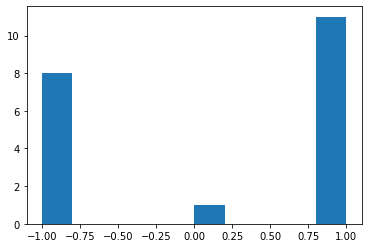

In [9]:
mags = []
for i in range(20):
    sim = IsingSimulation(size, temperature=2000)  # Ising model at the Curie temperature
    for _ in range(300000):
        sim.update()
        if _%100 == 0:
            temp = sim.temperature
            if temp == 1:
                continue
            else:
                sim.set_temperature(temp - 1)
    print(f"Finished {i} runs of simulation")
    mags.append(sim.average_magnetism())

print(mags)
plt.hist(mags)